In [3]:
import setup_notebook_environment
import pyciras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rich.pretty import pprint
from utility import config

In [89]:
base_csv_path = config.DATA_FOLDER / 'v1.0'
git_df = pd.read_csv(base_csv_path / 'git.csv')
lint_df = pd.read_csv(base_csv_path / 'lint.csv')
lint_df['date'] = pd.to_datetime(lint_df['date'])
metadata_df = pd.read_csv(base_csv_path / 'metadata.csv')
stargazers_df = pd.read_csv(base_csv_path / 'stargazers.csv')
stargazers_df['date'] = pd.to_datetime(stargazers_df['date'])
test_df = pd.read_csv(base_csv_path / 'test.csv')

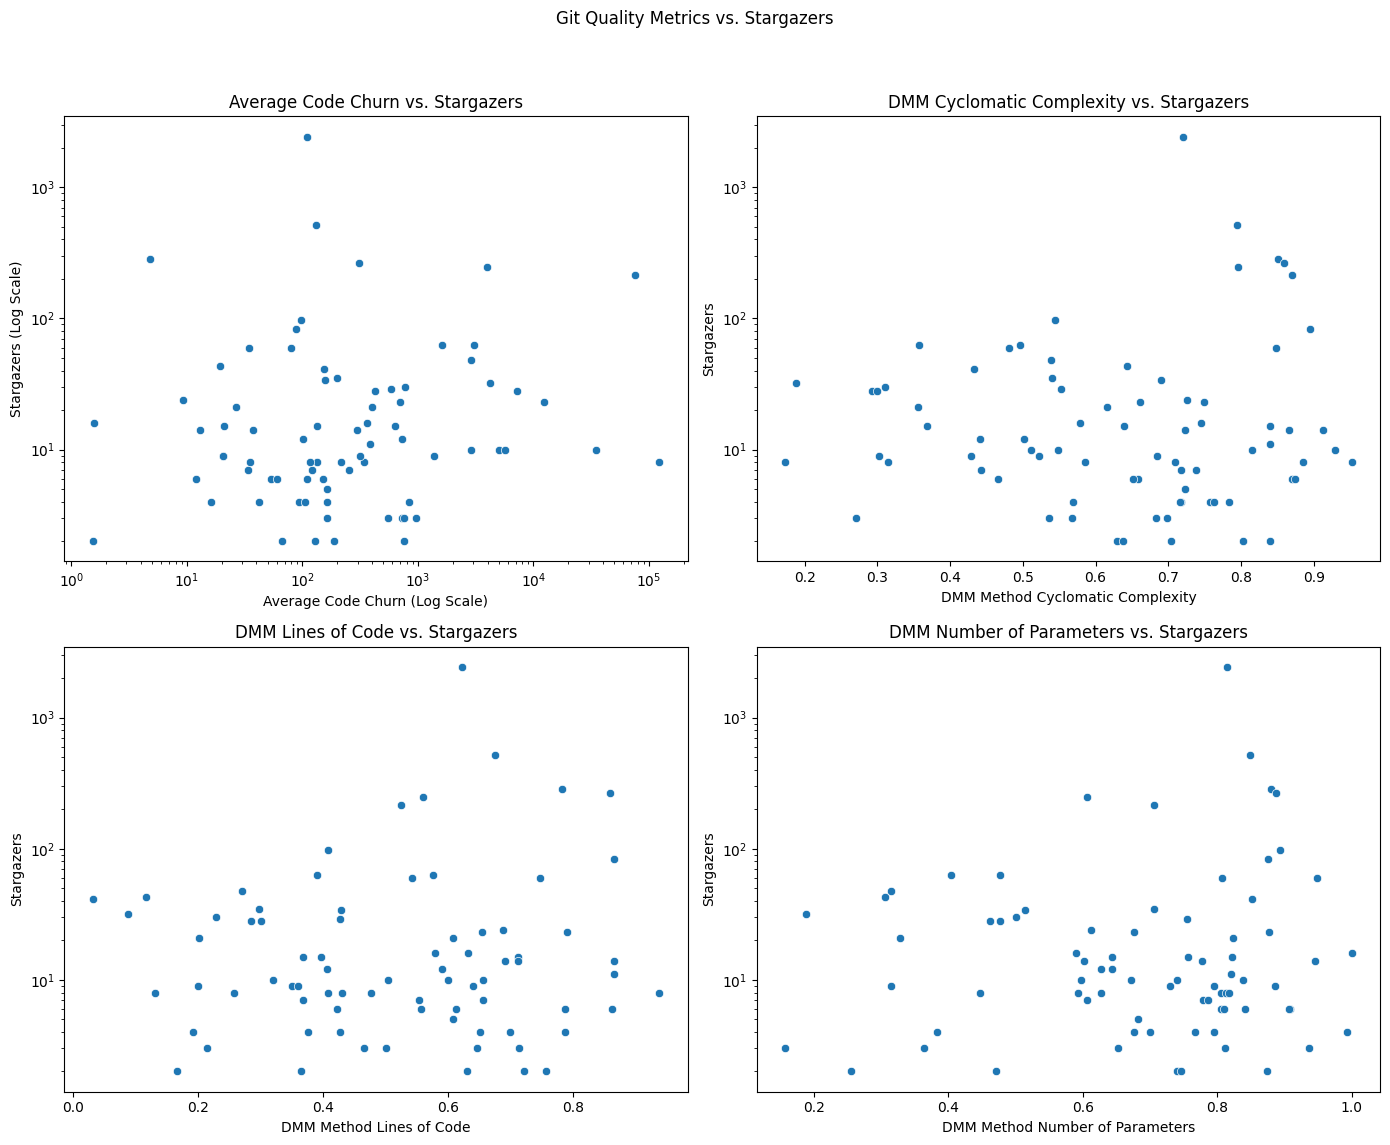

,average_code_churn_avg,average_dmm_method_cyclomatic_complexity,average_dmm_method_lines_of_code,average_dmm_method_number_of_parameters,stargazerCount
average_code_churn_avg,1.000000,-0.187537,-0.196329,0.058691,0.000569
average_dmm_method_cyclomatic_complexity,-0.187537,1.000000,0.760457,0.410248,0.107398
average_dmm_method_lines_of_code,-0.196329,0.760457,1.000000,0.542066,0.100575
average_dmm_method_number_of_parameters,0.058691,0.410248,0.542066,1.000000,0.107269
stargazerCount,0.000569,0.107398,0.100575,0.107269,1.000000


In [95]:
# Flat search, no per-commit data.

# avg_churn_dmm_star = pd.merge(avg_churn_dmm, metadata_df[['repo', 'stargazerCount']], on='repo')

# Same thing as above, 
avg_churn_dmm_star = pd.merge(avg_churn_dmm, metadata_df[['repo', 'stargazerCount']], on='repo').query('stargazerCount > 1')

correlation_matrix = avg_churn_dmm_star.drop('repo', axis=1).corr()

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Git Quality Metrics vs. Stargazers')

# Average Code Churn vs. Stargazers
sns.scatterplot(ax=axes[0, 0], data=avg_churn_dmm_star, x='average_code_churn_avg', y='stargazerCount')
axes[0, 0].set_title('Average Code Churn vs. Stargazers')
axes[0, 0].set_xscale('log')
axes[0, 0].set_yscale('log')
axes[0, 0].set_xlabel('Average Code Churn (Log Scale)')
axes[0, 0].set_ylabel('Stargazers (Log Scale)')

# DMM Cyclomatic Complexity vs. Stargazers
sns.scatterplot(ax=axes[0, 1], data=avg_churn_dmm_star, x='average_dmm_method_cyclomatic_complexity', y='stargazerCount')
axes[0, 1].set_title('DMM Cyclomatic Complexity vs. Stargazers')
axes[0, 1].set_yscale('log')
axes[0, 1].set_xlabel('DMM Method Cyclomatic Complexity')
axes[0, 1].set_ylabel('Stargazers')

# DMM Lines of Code vs. Stargazers
sns.scatterplot(ax=axes[1, 0], data=avg_churn_dmm_star, x='average_dmm_method_lines_of_code', y='stargazerCount')
axes[1, 0].set_title('DMM Lines of Code vs. Stargazers')
axes[1, 0].set_yscale('log')
axes[1, 0].set_xlabel('DMM Method Lines of Code')
axes[1, 0].set_ylabel('Stargazers')

# DMM Number of Parameters vs. Stargazers
sns.scatterplot(ax=axes[1, 1], data=avg_churn_dmm_star, x='average_dmm_method_number_of_parameters', y='stargazerCount')
axes[1, 1].set_title('DMM Number of Parameters vs. Stargazers')
axes[1, 1].set_xlabel('DMM Method Number of Parameters')
axes[1, 1].set_yscale('log')
axes[1, 1].set_ylabel('Stargazers')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

correlation_matrix

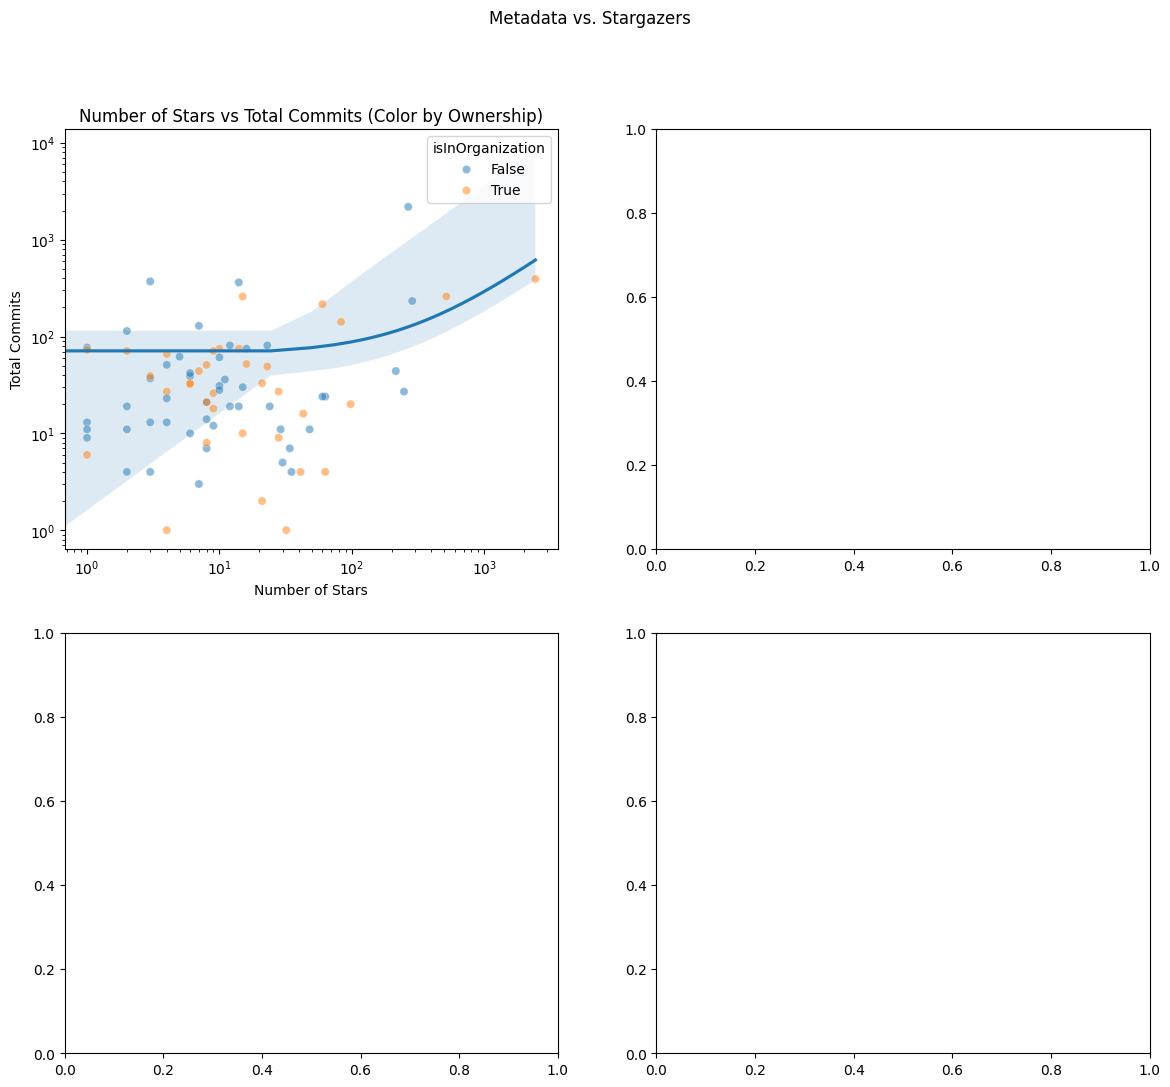

                  count       mean  median         std   max  min
isInOrganization                                                 
False                53  30.037736     8.0   66.547254   286    0
True                 37  99.891892    14.0  404.069011  2438    0


In [56]:
merged_metadata_git = pd.merge(metadata_df[['repo', 'isInOrganization', 'stargazerCount']], git_df[['repo', 'total_commits']], on='repo', how='inner')


fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Metadata vs. Stargazers')

sns.regplot(ax=axes[0, 0], data=merged_metadata_git, x="stargazerCount", y="total_commits", fit_reg=True, scatter=False)
sns.scatterplot(ax=axes[0, 0], data=merged_metadata_git, x="stargazerCount", y="total_commits", hue="isInOrganization", alpha=0.5)

axes[0, 0].set_title("Number of Stars vs Total Commits (Color by Ownership)")
axes[0, 0].set_xlabel("Number of Stars")
axes[0, 0].set_ylabel("Total Commits")
axes[0, 0].set_xscale("log")
axes[0, 0].set_yscale("log")

plt.show()
stats_by_ownership = metadata_df.groupby('isInOrganization')['stargazerCount'].agg(['count', 'mean', 'median', 'std', 'max', 'min'])
print(stats_by_ownership)

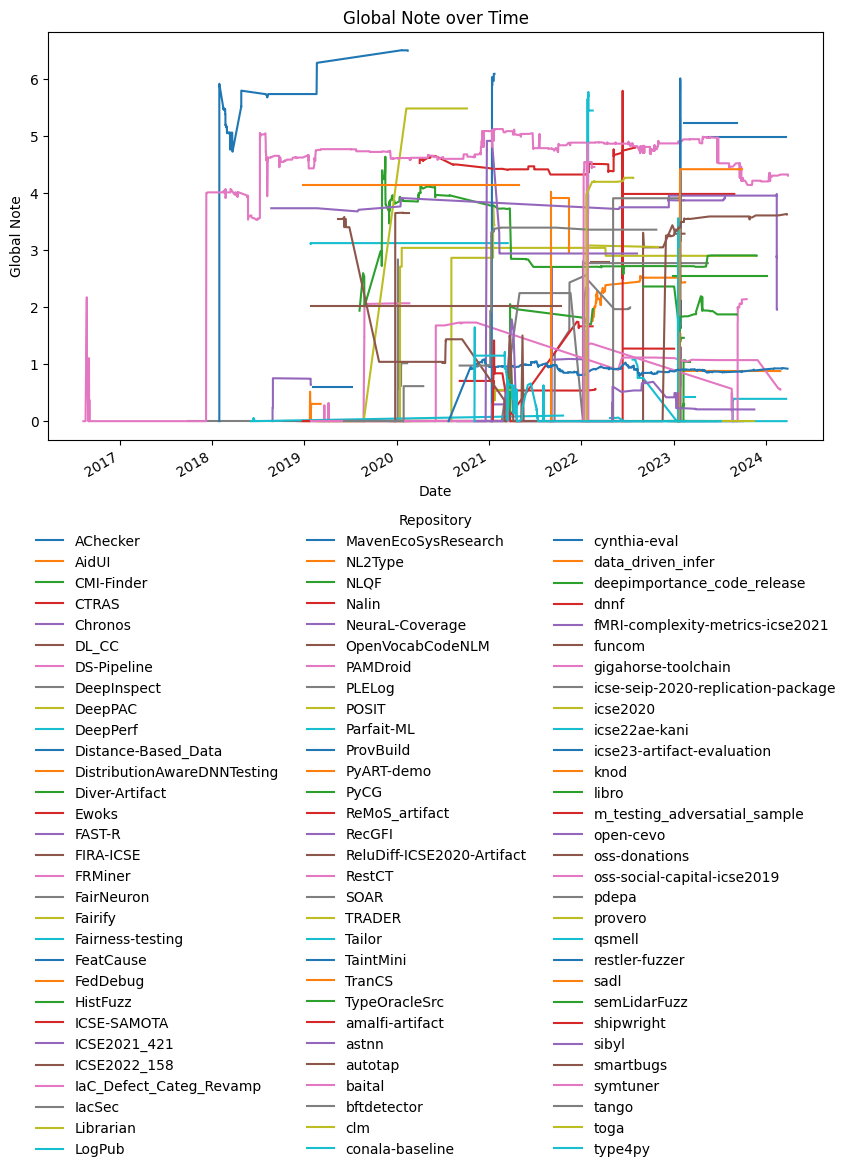

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))

for repo, group in lint_df.groupby('repo'):
    group.plot(x='date', y='global_note', ax=ax, label=repo)

plt.xlabel('Date')
plt.ylabel('Global Note')
plt.title('Global Note over Time')

# Put legend below
plt.legend(title='Repository', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, frameon=False)

plt.show()

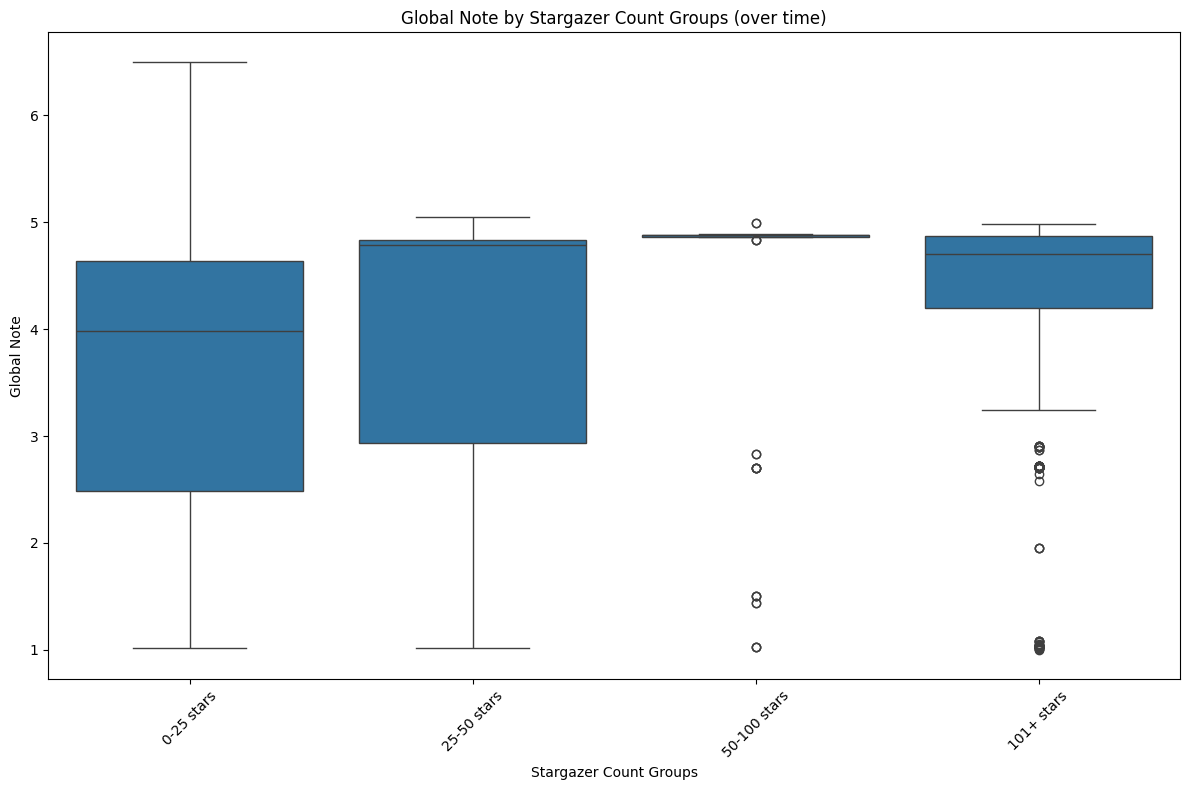

In [100]:
new_header = stargazers_df.iloc[0]  # Grab the first row for the header
new_stargazers_df = stargazers_df[1:]  # Take the data less the header row
new_stargazers_df.columns = new_header  # Set the header row as the df header
stargazers_df.reset_index(drop=True, inplace=True)

stargazers_long = stargazers_df.melt(id_vars=['date'], var_name='repo', value_name='stargazers')
stargazers_long['stargazers'] = pd.to_numeric(stargazers_long['stargazers'], errors='coerce')

# Ensure both DataFrames are sorted by 'date'
lint_df_sorted = lint_df.query('global_note > 0').sort_values(by='date')
stargazers_long_sorted = stargazers_long.sort_values(by='date')

# Perform the 'as of' merge
merged_global_star_df = pd.merge_asof(
    left=lint_df_sorted,
    right=stargazers_long_sorted,
    on='date',
    by='repo',
    direction='forward'  # Look forward from the commit date towards the next stargazer count 
)

bins = [0, 25, 50, 100, float('inf')]
labels = ['0-25 stars', '25-50 stars', '50-100 stars', '101+ stars']

# Categorize 'stargazers' into the defined bins
merged_global_star_df['stargazer_group'] = pd.cut(merged_global_star_df['stargazers'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 8))
sns.boxplot(x='stargazer_group', y='global_note', data=merged_global_star_df)

plt.title('Global Note by Stargazer Count Groups (over time)')
plt.xlabel('Stargazer Count Groups')
plt.ylabel('Global Note')
plt.xticks(rotation=45)  # Improve label readability if necessary
plt.tight_layout()  # Adjust layout to make room for the label

plt.show()